# Reading/Info

In [1]:
import pandas as pd
dataset = pd.read_csv("/Users/thiagoturini/Desktop/LibertyCase/casestudy_data.csv", low_memory = False)
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678013 entries, 0 to 678012
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   policy_desc                 678013 non-null  int64 
 1   claim_count                 678013 non-null  int64 
 2   cat_areacode                678013 non-null  object
 3   num_vehicleAge              678013 non-null  int64 
 4   num_noClaimDiscountPercent  678013 non-null  int64 
 5   cat_carBrand                678013 non-null  object
 6   num_populationDensitykmsq   678013 non-null  int64 
 7   cat_Region                  678013 non-null  object
 8   ord_vehicleHP               678013 non-null  int64 
 9   num_exposure                678013 non-null  object
 10  cat_fuelType                677991 non-null  object
 11  num_driverAge               677999 non-null  object
dtypes: int64(6), object(6)
memory usage: 62.1+ MB
None


In [2]:
dataset.set_index('policy_desc', inplace=True)
dataset.head(10)

,claim_count,cat_areacode,num_vehicleAge,num_noClaimDiscountPercent,cat_carBrand,num_populationDensitykmsq,cat_Region,ord_vehicleHP,num_exposure,cat_fuelType,num_driverAge
policy_desc,,,,,,,,,,,
1,1,D,0,50,B12,1217,R82,5,0.1,Regular,55
3,1,D,0,50,B12,1217,R82,5,0.77,Regular,55
5,1,B,2,50,B12,54,R22,6,0.75,Diesel,52
10,1,B,0,50,B12,76,R72,7,0.09,Diesel,46
11,1,B,0,50,B12,76,R72,7,0.84,Diesel,46
13,1,E,2,50,B12,3003,R31,6,0.52,Regular,38
15,1,E,2,50,B12,3003,R31,6,0.45,Regular,38
17,1,C,0,68,B12,137,R91,7,0.27,Diesel,33
18,1,C,0,68,B12,137,R91,7,0.71,Diesel,33


# Missing Values

In [3]:
print(dataset.isnull().sum())

claim_count                    0
cat_areacode                   0
num_vehicleAge                 0
num_noClaimDiscountPercent     0
cat_carBrand                   0
num_populationDensitykmsq      0
cat_Region                     0
ord_vehicleHP                  0
num_exposure                   0
cat_fuelType                  22
num_driverAge                 14
dtype: int64


#### Check num_exposure(object), cat_fuelType(missing values) and num_driverAge(object and missing values)

In [4]:
dataset['num_exposure'].unique()

array(['0.1', '0.77', '0.75', '0.09', '0.84', '0.52', '0.45', '0.27',
       '0.71', '0.15', '0.87', '0.81', '0.05', '0.76', '0.34', '0.74',
       '0.03', '0.06', '0.55', '0.19', '0.01', '0.79', '0.04', '0.8',
       '0.07', '0.39', '0.47', '0.69', '0.16', '0.12', '0.41', '0.46',
       '0.82', '0.11', '0.08', '0.02', '0.72', '0.14', '0.5', '0.92',
       '0.9', '0.78', '0.83', '0.67', '0.13', '0.59', '0.21', '0.65',
       '0.42', '0.85', '0.73', '0.23', '0.48', '0.37', '0.86', '0.17',
       '0.24', '0.63', '0.51', '0.64', '0.66', '0.18', '0.31', '0.35',
       '0.25', '0.62', '0.22', '0.7', '0.58', '0.28', '0.61', '0.53',
       '0.2', '0.008196721', '0.005464481', '0.43', '0.33', '0.57',
       '0.36', '0.56', '0.3', '0.6', '0.68', '0.97', '0.54', '0.44',
       '0.49', '0.29', '0.32', '0.26', '0.00273224', '0.96', '0.98',
       '0.88', '0.4', '0.89', '0.38', '0.95', '0.94', '0.93', '0.91', '1',
       '0.99', '23years', '0.005479452', '0.002739726', '0.008219178',
       '10year

In [5]:
dataset['num_exposure'].str.isnumeric().value_counts()

False    509905
True     168108
Name: num_exposure, dtype: int64

In [6]:
dataset_non = dataset.copy()
dataset_non['num_exposure'] = pd.to_numeric(dataset_non['num_exposure'],errors='coerce')
num_exposure_missing = dataset_non[dataset_non['num_exposure'].isna()]
print(pd.DataFrame(dataset[['num_exposure','num_vehicleAge','num_driverAge']], index=num_exposure_missing.index))

            num_exposure  num_vehicleAge num_driverAge
policy_desc                                           
72941            23years               1            35
178332           23years               2            53
1012881          23years               0            26
1013183          23years               0            53
1013665          10years               8            26
...                  ...             ...           ...
6072907          23years               4            57
6099159          37years               3            48
6109486          37years               1            28
6112175          37years               2            40
6114276          37years               3            52

[71 rows x 3 columns]


### Wrong values for 'num_exposure' are not valuable. And we can transform the column into numeric

In [7]:
dataset['num_driverAge'].str.isnumeric().value_counts()

True     677975
False        24
Name: num_driverAge, dtype: int64

In [8]:
driver_age_missing = dataset[dataset['num_driverAge'].str.isnumeric() == False]
fuel_type_missing = dataset[dataset['cat_fuelType'].isna()]
num_exposure_missing = dataset_non[dataset_non['num_exposure'].isna()]
print('num_exposure_missing mean', num_exposure_missing[['claim_count']].mean())
print('driver_age_missing mean', driver_age_missing[['claim_count']].mean())
print('fuel_type_missing mean', fuel_type_missing[['claim_count']].mean())
print('dataset neab', dataset[['claim_count']].mean())

num_exposure_missing mean claim_count    0.084507
dtype: float64
driver_age_missing mean claim_count    0.041667
dtype: float64
fuel_type_missing mean claim_count    0.045455
dtype: float64
dataset neab claim_count    0.053247
dtype: float64


### Missing and blank values for 'num_exposure', 'driver_age', 'fuel_type_missing' are not significant. Regarding to the volume of data.

In [9]:
dataset['num_exposure'] = pd.to_numeric(dataset['num_exposure'],errors='coerce')
dataset['num_driverAge'] = pd.to_numeric(dataset['num_driverAge'],errors='coerce')

dataset["num_exposure"].fillna(dataset["num_exposure"].mean(),inplace=True)
dataset["num_driverAge"].fillna(dataset["num_driverAge"].mean(),inplace=True)
dataset["cat_fuelType"].fillna(dataset["cat_fuelType"].mode()[0],inplace=True)
print(dataset.isnull().sum())

claim_count                   0
cat_areacode                  0
num_vehicleAge                0
num_noClaimDiscountPercent    0
cat_carBrand                  0
num_populationDensitykmsq     0
cat_Region                    0
ord_vehicleHP                 0
num_exposure                  0
cat_fuelType                  0
num_driverAge                 0
dtype: int64


# Target Variable

0     643953
1      32178
2       1784
3         82
4          7
11         3
5          2
6          1
8          1
9          1
16         1
Name: claim_count, dtype: int64

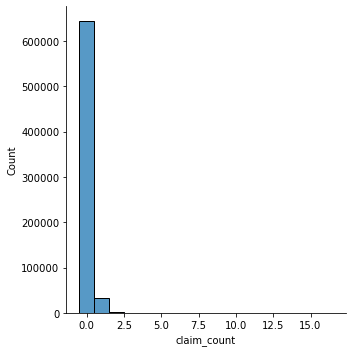

In [10]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sns.displot(dataset, x= 'claim_count', discrete=True)
dataset['claim_count'].value_counts()

<AxesSubplot:xlabel='claim_count'>

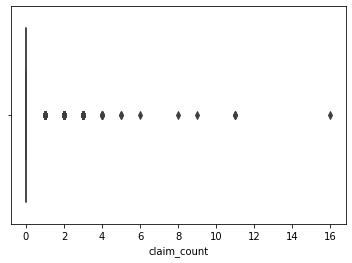

In [11]:
sns.boxplot(x=dataset['claim_count'])

0    643953
1     34060
Name: claim_binary, dtype: int64

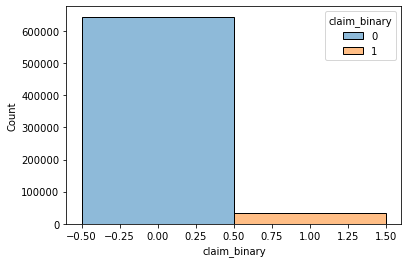

In [12]:
dataset['claim_binary'] = np.where(dataset['claim_count'] >= 1, 1, 0)
sns.histplot(data=dataset, x= 'claim_binary', discrete=True, hue="claim_binary")
dataset['claim_binary'].value_counts()


<AxesSubplot:>

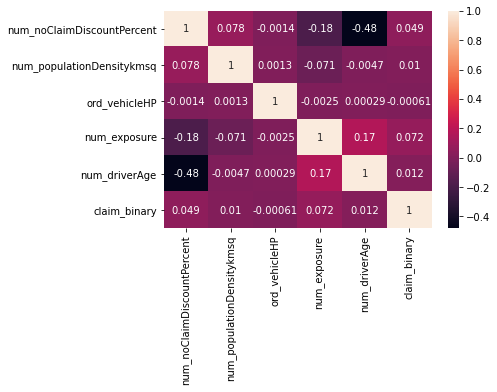

In [13]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
numerical = dataset.select_dtypes(exclude='object').iloc[:,2:9]
scaler = MinMaxScaler()
numerical_norm = pd.DataFrame(scaler.fit_transform(numerical), columns=numerical.columns)
corrMatrix = numerical_norm.corr()
sns.heatmap(corrMatrix, annot=True)

## Check categorical variables

In [14]:
categorical = dataset.select_dtypes(include='object')
categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 678013 entries, 1 to 6114330
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   cat_areacode  678013 non-null  object
 1   cat_carBrand  678013 non-null  object
 2   cat_Region    678013 non-null  object
 3   cat_fuelType  678013 non-null  object
dtypes: object(4)
memory usage: 42.0+ MB


In [15]:
dataset.groupby(['cat_areacode'])['claim_count'].agg(['sum', 'count', 'mean']) 

,sum,count,mean
cat_areacode,,,
A,5063,103957,0.048703
B,3800,75459,0.050358
C,9875,191880,0.051464
D,8428,151596,0.055595
E,7805,137167,0.056901
F,1131,17954,0.062994


<AxesSubplot:xlabel='cat_areacode', ylabel='Count'>

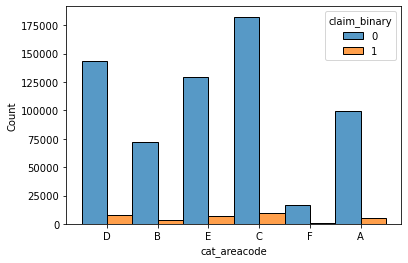

In [16]:
sns.histplot(data=dataset, x= 'cat_areacode', discrete=True, hue="claim_binary", multiple="dodge")

In [17]:
dataset.groupby(['cat_carBrand'])['claim_count'].agg(['sum', 'count', 'mean']) 

,sum,count,mean
cat_carBrand,,,
B1,8677,162736,0.053319
B10,858,17707,0.048455
B11,721,13585,0.053073
B12,8859,166024,0.053360
B13,649,12178,0.053293
B14,166,4047,0.041018
B2,8560,159861,0.053547
B3,2818,53395,0.052776
B4,1312,25179,0.052107


<AxesSubplot:xlabel='cat_carBrand', ylabel='Count'>

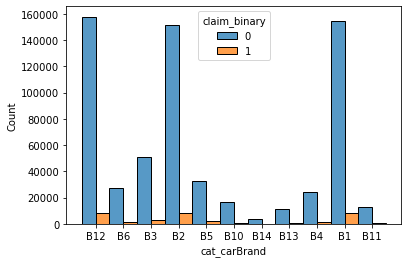

In [18]:
sns.histplot(data=dataset, x='cat_carBrand', discrete=True, hue="claim_binary", multiple="dodge")

In [19]:
dataset.groupby(['cat_Region'])['claim_count'].agg(['sum', 'count', 'mean']) 

,sum,count,mean
cat_Region,,,
R11,3978,69791,0.056999
R21,160,3026,0.052875
R22,439,7994,0.054916
R23,303,8784,0.034495
R24,9204,160601,0.057310
R25,633,10893,0.058111
R26,511,10492,0.048704
R31,1176,27285,0.043101
R41,611,12990,0.047036


<AxesSubplot:xlabel='Count', ylabel='cat_Region'>

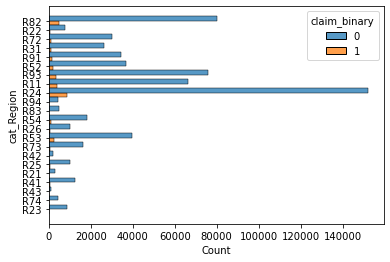

In [20]:
sns.histplot(data=dataset, y='cat_Region', discrete=True, hue="claim_binary", multiple="dodge")

In [21]:
dataset.groupby(['cat_fuelType'])['claim_count'].agg(['sum', 'count', 'mean']) 

,sum,count,mean
cat_fuelType,,,
Diesel,16646,332121,0.050120
Electric,3,15,0.200000
Regular,19453,345877,0.056243


<AxesSubplot:xlabel='cat_fuelType', ylabel='Count'>

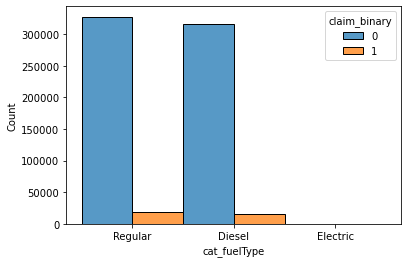

In [22]:
sns.histplot(data=dataset, x='cat_fuelType', discrete=True, hue="claim_binary", multiple="dodge")

In [23]:
dataset[dataset['cat_fuelType'] == 'Electric']

,claim_count,cat_areacode,num_vehicleAge,num_noClaimDiscountPercent,cat_carBrand,num_populationDensitykmsq,cat_Region,ord_vehicleHP,num_exposure,cat_fuelType,num_driverAge,claim_binary
policy_desc,,,,,,,,,,,,
6528,1,D,1,50,B3,1976,R93,4,0.070000,Electric,32.0,1
27710,0,B,9,50,B2,60,R24,7,0.440000,Electric,41.0,0
153256,0,A,15,50,B5,41,R26,6,1.000000,Electric,58.0,0
1027758,1,C,10,50,B2,172,R24,6,0.480000,Electric,56.0,1
1057654,0,C,10,50,B2,473,R53,7,1.000000,Electric,58.0,0
1182550,0,C,10,50,B1,211,R93,6,0.490000,Electric,40.0,0
2038069,0,E,0,50,B12,3019,R73,7,0.060000,Electric,35.0,0
2079195,0,C,8,50,B4,137,R42,7,1.000000,Electric,42.0,0
2088586,0,A,21,64,B2,23,R24,4,0.002740,Electric,63.0,0


In [24]:
print('Percentual Eletric Cars (%)', round(100*len(dataset[dataset['cat_fuelType'] == 'Electric'])/len(dataset),3))

Percentual Eletric Cars (%) 0.002


In [25]:
cat_fuelType_dummies = pd.get_dummies(dataset['cat_fuelType'])
dataset = pd.concat([dataset, cat_fuelType_dummies], axis=1)

### Regions/Area/Density

<AxesSubplot:xlabel='claim_binary', ylabel='num_populationDensitykmsq'>

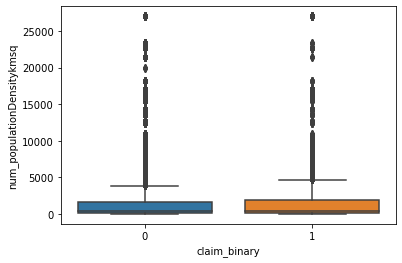

In [26]:
sns.boxplot(x=dataset['claim_binary'], y=dataset['num_populationDensitykmsq'])

In [27]:
dataset.groupby(["cat_areacode"])["num_populationDensitykmsq"].mean()

cat_areacode
A       27.502852
B       72.582184
C      248.935324
D     1075.898493
E     4380.299598
F    22014.560878
Name: num_populationDensitykmsq, dtype: float64

<AxesSubplot:xlabel='num_populationDensitykmsq', ylabel='cat_areacode'>

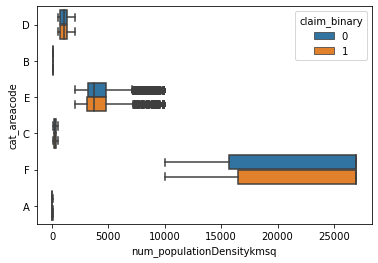

In [28]:
sns.boxplot(x="num_populationDensitykmsq", y="cat_areacode", hue="claim_binary", data=dataset)

In [29]:
dataset.groupby(["cat_Region"])["num_populationDensitykmsq"].mean()

cat_Region
R11    8085.690060
R21     917.192664
R22     885.761321
R23    1629.031421
R24     461.437749
R25     756.039658
R26     608.455299
R31    1589.231629
R41     959.930331
R42    1722.001364
R43     510.482655
R52    1066.526593
R53     628.970087
R54     475.576446
R72    1201.976539
R73    1013.716703
R74     294.319904
R82    2209.223912
R83     772.355967
R91     650.135568
R93    1607.768896
R94     534.260407
Name: num_populationDensitykmsq, dtype: float64

<AxesSubplot:xlabel='num_populationDensitykmsq', ylabel='cat_Region'>

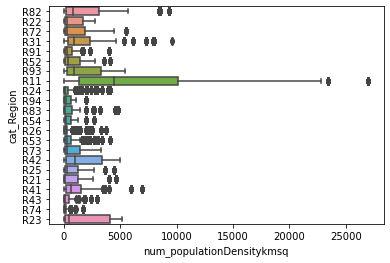

In [30]:
sns.boxplot(x="num_populationDensitykmsq", y="cat_Region", data=dataset)

#### "cat_areacode" and "num_populationDensitykmsq" are "correlated"

In [31]:
dataset.groupby(['cat_areacode'])['claim_count'].agg(['sum', 'count', 'mean']) 

,sum,count,mean
cat_areacode,,,
A,5063,103957,0.048703
B,3800,75459,0.050358
C,9875,191880,0.051464
D,8428,151596,0.055595
E,7805,137167,0.056901
F,1131,17954,0.062994


In [32]:
dataset.groupby(['cat_Region'])['claim_count'].agg(['sum', 'count', 'mean']) 

,sum,count,mean
cat_Region,,,
R11,3978,69791,0.056999
R21,160,3026,0.052875
R22,439,7994,0.054916
R23,303,8784,0.034495
R24,9204,160601,0.057310
R25,633,10893,0.058111
R26,511,10492,0.048704
R31,1176,27285,0.043101
R41,611,12990,0.047036


In [33]:
#cat_areacode_dummies = pd.get_dummies(dataset['cat_areacode'])
#dataset = pd.concat([dataset, cat_areacode_dummies], axis=1)
#print(dataset.info())

In [34]:
Q3 = np.quantile(dataset['num_populationDensitykmsq'], 0.75)
Q1 = np.quantile(dataset['num_populationDensitykmsq'], 0.25)
IQR = Q3 - Q1
print(Q1,Q3, IQR)
print("lower_range", Q1 - 1.5 * IQR)
print("upper_range", Q3 + 1.5 * IQR)

92.0 1658.0 1566.0
lower_range -2257.0
upper_range 4007.0


In [35]:
dataset['BigCity'] = np.where((dataset['num_populationDensitykmsq'] > 4007) & (dataset['num_populationDensitykmsq'] < 25000), 1, 0)
dataset['Megalopole'] = np.where(dataset['num_populationDensitykmsq'] > 25000, 1, 0)
dataset['AvgCity'] = np.where(dataset['num_populationDensitykmsq'] <= 4007, 1, 0)
print(dataset['BigCity'].value_counts())
print(dataset['Megalopole'].value_counts())
print(dataset['AvgCity'].value_counts())

0    610962
1     67051
Name: BigCity, dtype: int64
0    667498
1     10515
Name: Megalopole, dtype: int64
1    600447
0     77566
Name: AvgCity, dtype: int64


In [36]:
dataset['BigRegions'] = np.where((dataset['cat_Region'] == 'R24')| 
                                (dataset['cat_Region'] == 'R82')|
                                (dataset['cat_Region'] == 'R93')|
                                 (dataset['cat_Region'] == 'R11'), 1, 0)

dataset['MediumRegions'] = np.where((dataset['cat_Region'] == 'R53')| 
                                   (dataset['cat_Region'] == 'R52')|
                                   (dataset['cat_Region'] == 'R91')|
                                    (dataset['cat_Region'] == 'R72')|
                                    (dataset['cat_Region'] == 'R31'), 1, 0)

dataset['SmallRegions'] = np.where((dataset['BigRegions'] != 1) &
                                   (dataset['MediumRegions'] != 1), 1, 0)

print(dataset['BigRegions'].value_counts())
print(dataset['MediumRegions'].value_counts())
print(dataset['SmallRegions'].value_counts())

1    394459
0    283554
Name: BigRegions, dtype: int64
0    502721
1    175292
Name: MediumRegions, dtype: int64
0    569751
1    108262
Name: SmallRegions, dtype: int64


### Car Brand

In [37]:
dataset.groupby(['cat_carBrand'])['claim_count'].agg(['sum', 'count', 'mean']) 

,sum,count,mean
cat_carBrand,,,
B1,8677,162736,0.053319
B10,858,17707,0.048455
B11,721,13585,0.053073
B12,8859,166024,0.053360
B13,649,12178,0.053293
B14,166,4047,0.041018
B2,8560,159861,0.053547
B3,2818,53395,0.052776
B4,1312,25179,0.052107


<AxesSubplot:xlabel='cat_carBrand', ylabel='Count'>

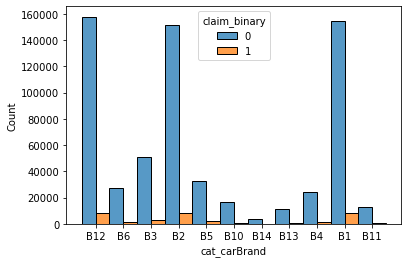

In [38]:
sns.histplot(data=dataset, x='cat_carBrand', discrete=True, hue="claim_binary", multiple="dodge")

In [39]:
dataset['BigBrands'] = np.where((dataset['cat_carBrand'] == 'B1')| 
                                (dataset['cat_carBrand'] == 'B2')|
                                (dataset['cat_carBrand'] == 'B12'), 1, 0)

dataset['MediumBrands'] = np.where((dataset['cat_carBrand'] == 'B3')| 
                                   (dataset['cat_carBrand'] == 'B4')|
                                   (dataset['cat_carBrand'] == 'B5')|
                                   (dataset['cat_carBrand'] == 'B6'), 1, 0)

dataset['SmallBrands'] = np.where((dataset['cat_carBrand'] == 'B10')| 
                                   (dataset['cat_carBrand'] == 'B11')|
                                   (dataset['cat_carBrand'] == 'B13')|
                                   (dataset['cat_carBrand'] == 'B14'), 1, 0)

print(dataset['SmallBrands'].value_counts())
print(dataset['MediumBrands'].value_counts())
print(dataset['BigBrands'].value_counts())

0    630496
1     47517
Name: SmallBrands, dtype: int64
0    536138
1    141875
Name: MediumBrands, dtype: int64
1    488621
0    189392
Name: BigBrands, dtype: int64


### ord_vehicleHP 

,ord_vehicleHP
count,678013.000000
mean,6.948194
std,64.908621
min,4.000000
25%,5.000000
50%,6.000000
75%,7.000000
max,9999.000000


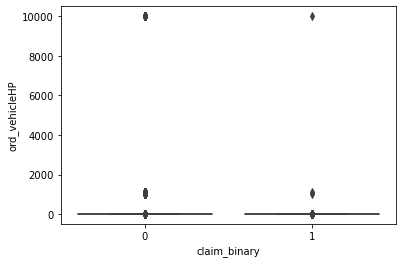

In [40]:
sns.boxplot(x=dataset['claim_binary'], y=dataset['ord_vehicleHP'])
dataset[['ord_vehicleHP']].describe()

In [41]:
Q3 = np.quantile(dataset['ord_vehicleHP'], 0.75)
Q1 = np.quantile(dataset['ord_vehicleHP'], 0.25)
IQR = Q3 - Q1
print(Q1,Q3, IQR)
print("lower_range", Q1 - 1.5 * IQR)
print("upper_range", Q3 + 1.5 * IQR)


5.0 7.0 2.0
lower_range 2.0
upper_range 10.0


In [42]:
dataset['SportCar'] = np.where((dataset['ord_vehicleHP'] > 10) & (dataset['ord_vehicleHP'] < 8000), 1, 0)
dataset['F1Car'] = np.where(dataset['ord_vehicleHP'] > 2000, 1, 0)
dataset['AvgCar'] = np.where(dataset['ord_vehicleHP'] <= 10, 1, 0)
print(dataset['SportCar'].value_counts())
print(dataset['F1Car'].value_counts())
print(dataset['AvgCar'].value_counts())

0    642895
1     35118
Name: SportCar, dtype: int64
0    677985
1        28
Name: F1Car, dtype: int64
1    642867
0     35146
Name: AvgCar, dtype: int64


<AxesSubplot:xlabel='claim_binary', ylabel='ord_vehicleHP'>

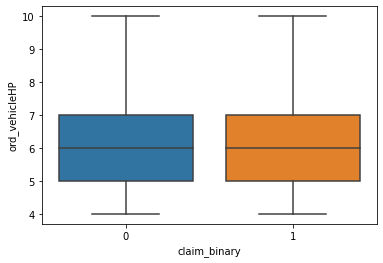

In [43]:
dataset[dataset['AvgCar'] == 1]['ord_vehicleHP'].describe()
sns.boxplot(x=dataset['claim_binary'], y=dataset[dataset['AvgCar'] == 1]['ord_vehicleHP'])

###  num_driverAge 

,num_driverAge
count,678013.000000
mean,45.499108
std,14.137184
min,18.000000
25%,34.000000
50%,44.000000
75%,55.000000
max,100.000000


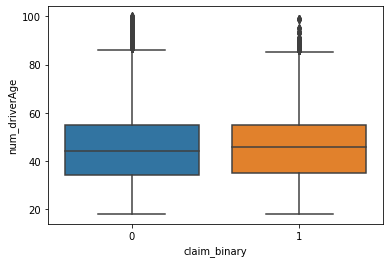

In [44]:
sns.boxplot(x=dataset['claim_binary'], y=dataset['num_driverAge'])
dataset[['num_driverAge']].describe()

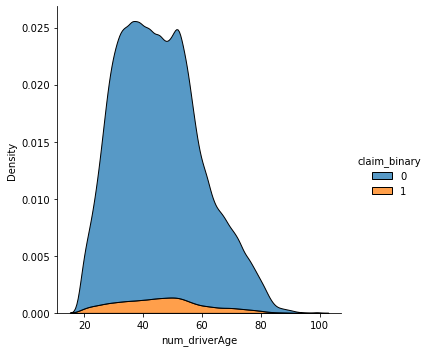

In [45]:
sns.displot(dataset, x="num_driverAge", hue="claim_binary", kind="kde", multiple="stack")

In [46]:
Q3 = np.quantile(dataset['num_driverAge'], 0.75)
Q1 = np.quantile(dataset['num_driverAge'], 0.25)
IQR = Q3 - Q1
print(Q1,Q3, IQR)
print("lower_range", Q1 - 1.5 * IQR)
print("upper_range", Q3 + 1.5 * IQR)

34.0 55.0 21.0
lower_range 2.5
upper_range 86.5


###  num_noClaimDiscountPercent 

,num_noClaimDiscountPercent
count,678013.000000
mean,59.761502
std,15.636658
min,50.000000
25%,50.000000
50%,50.000000
75%,64.000000
max,230.000000


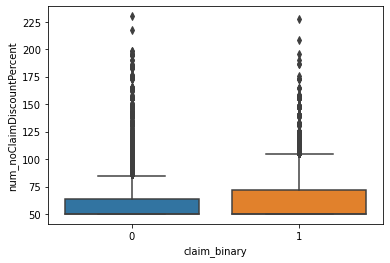

In [47]:
sns.boxplot(x=dataset['claim_binary'], y=dataset['num_noClaimDiscountPercent'])
dataset[['num_noClaimDiscountPercent']].describe()

In [48]:
dataset['Discount'] = np.where(dataset['num_noClaimDiscountPercent'] < 100, 1, 0)
dataset['Discount (n)'] = np.where(dataset['Discount'] == 1,
                                           100 - dataset['num_noClaimDiscountPercent'], 0)
dataset['Premium_Increased'] = np.where(dataset['num_noClaimDiscountPercent'] > 100, 1, 0)
dataset['Premium_Increased (n)'] = np.where(dataset['Premium_Increased'] == 1,
                                           dataset['num_noClaimDiscountPercent'] - 100, 0)

print(dataset['Discount'].value_counts())
print(dataset['Premium_Increased'].value_counts())

1    650689
0     27324
Name: Discount, dtype: int64
0    670219
1      7794
Name: Premium_Increased, dtype: int64


In [49]:
dataset.groupby(['Discount'])['claim_count'].agg(['sum', 'count', 'mean']) 

,sum,count,mean
Discount,,,
0,3063,27324,0.112099
1,33039,650689,0.050775


<AxesSubplot:xlabel='claim_binary', ylabel='Discount (n)'>

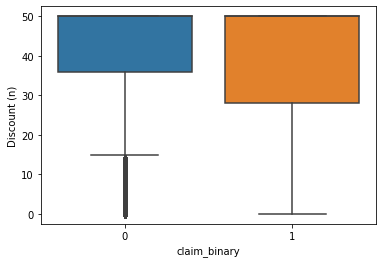

In [50]:
sns.boxplot(x=dataset['claim_binary'], y=dataset['Discount (n)'])

In [51]:
dataset.groupby(['Premium_Increased'])['claim_count'].agg(['sum', 'count', 'mean']) 

,sum,count,mean
Premium_Increased,,,
0,34760,670219,0.051864
1,1342,7794,0.172184


<AxesSubplot:xlabel='claim_binary', ylabel='Premium_Increased (n)'>

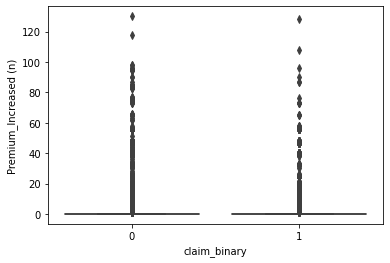

In [52]:
sns.boxplot(x=dataset['claim_binary'], y=dataset['Premium_Increased (n)'])

 ### Num_vehicleAge 

,num_vehicleAge
count,678013.000000
mean,7.044265
std,5.666232
min,0.000000
25%,2.000000
50%,6.000000
75%,11.000000
max,100.000000


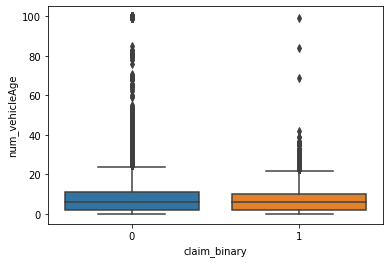

In [53]:
sns.boxplot(x=dataset['claim_binary'], y=dataset['num_vehicleAge'])
dataset[['num_vehicleAge']].describe()

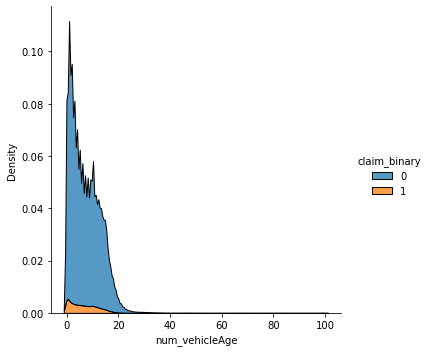

In [54]:
sns.displot(dataset, x="num_vehicleAge", hue="claim_binary", kind="kde", multiple="stack")

 ### Num_exposure

,num_exposure
count,678013.000000
mean,0.528750
std,0.364422
min,0.002732
25%,0.180000
50%,0.490000
75%,0.990000
max,2.010000


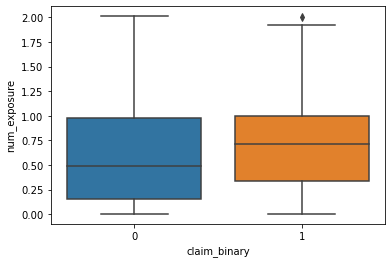

In [55]:
sns.boxplot(x=dataset['claim_binary'], y=dataset['num_exposure'])
dataset[['num_exposure']].describe()

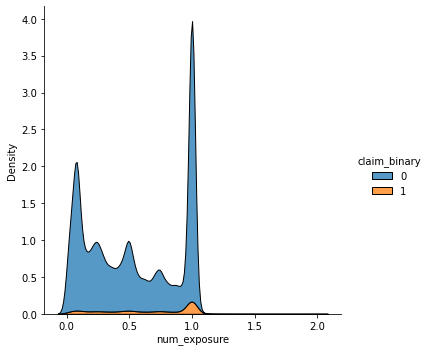

In [56]:
sns.displot(dataset, x="num_exposure", hue="claim_binary", kind="kde", multiple="stack")

## Colinearity

In [57]:
numerical = dataset.select_dtypes(exclude='object')
numerical.corrwith(numerical["claim_count"])

claim_count                   1.000000
num_vehicleAge               -0.021768
num_noClaimDiscountPercent    0.050544
num_populationDensitykmsq     0.010754
ord_vehicleHP                -0.000677
num_exposure                  0.068912
num_driverAge                 0.011389
claim_binary                  0.964217
Diesel                       -0.012759
Electric                      0.002875
Regular                       0.012732
BigCity                       0.005015
Megalopole                    0.006120
AvgCity                      -0.007080
BigRegions                    0.013914
MediumRegions                -0.007726
SmallRegions                 -0.009501
BigBrands                     0.001075
MediumBrands                  0.000870
SmallBrands                  -0.003275
SportCar                     -0.005985
F1Car                        -0.000469
AvgCar                        0.005996
Discount                     -0.050226
Discount (n)                 -0.045330
Premium_Increased        

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(data):
    vif = pd.DataFrame()
    vif["variables"] = data.columns
    vif["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return(vif)

numerical_vif = numerical[['num_vehicleAge',
                          'ord_vehicleHP',
                           'num_noClaimDiscountPercent',
                          'num_exposure',
                          'num_driverAge',
                          ]]
scaler = MinMaxScaler()
numerical_vif_norm = pd.DataFrame(scaler.fit_transform(numerical_vif), columns=numerical_vif.columns)
calc_vif(numerical_vif_norm)

,variables,VIF
0,num_vehicleAge,2.377016
1,ord_vehicleHP,1.001832
2,num_noClaimDiscountPercent,1.271746
3,num_exposure,2.920480
4,num_driverAge,2.781331


## Drop Outliers

In [59]:
X_drop_outliers = numerical[(numerical['F1Car'] != 1) &
                    (numerical['Megalopole'] != 1)&
                    (numerical['Electric'] != 1)]

y_drop_outliers = X_drop_outliers[['claim_binary']]
y_regression_outliers = X_drop_outliers[['claim_count']]

X_drop_outliers = X_drop_outliers.drop(labels=['F1Car',
                                               'Megalopole',
                                               'Electric',
                                               'claim_count',
                                               'claim_binary'
                                              ], axis=1)

print(dataset.shape)
print(X_drop_outliers.shape)

outliers_percentual = round((dataset.shape[0] - X_drop_outliers.shape[0])* 100 /dataset.shape[0],2)
print('Outliers (%) =', outliers_percentual)


(678013, 31)
(667455, 22)
Outliers (%) = 1.56


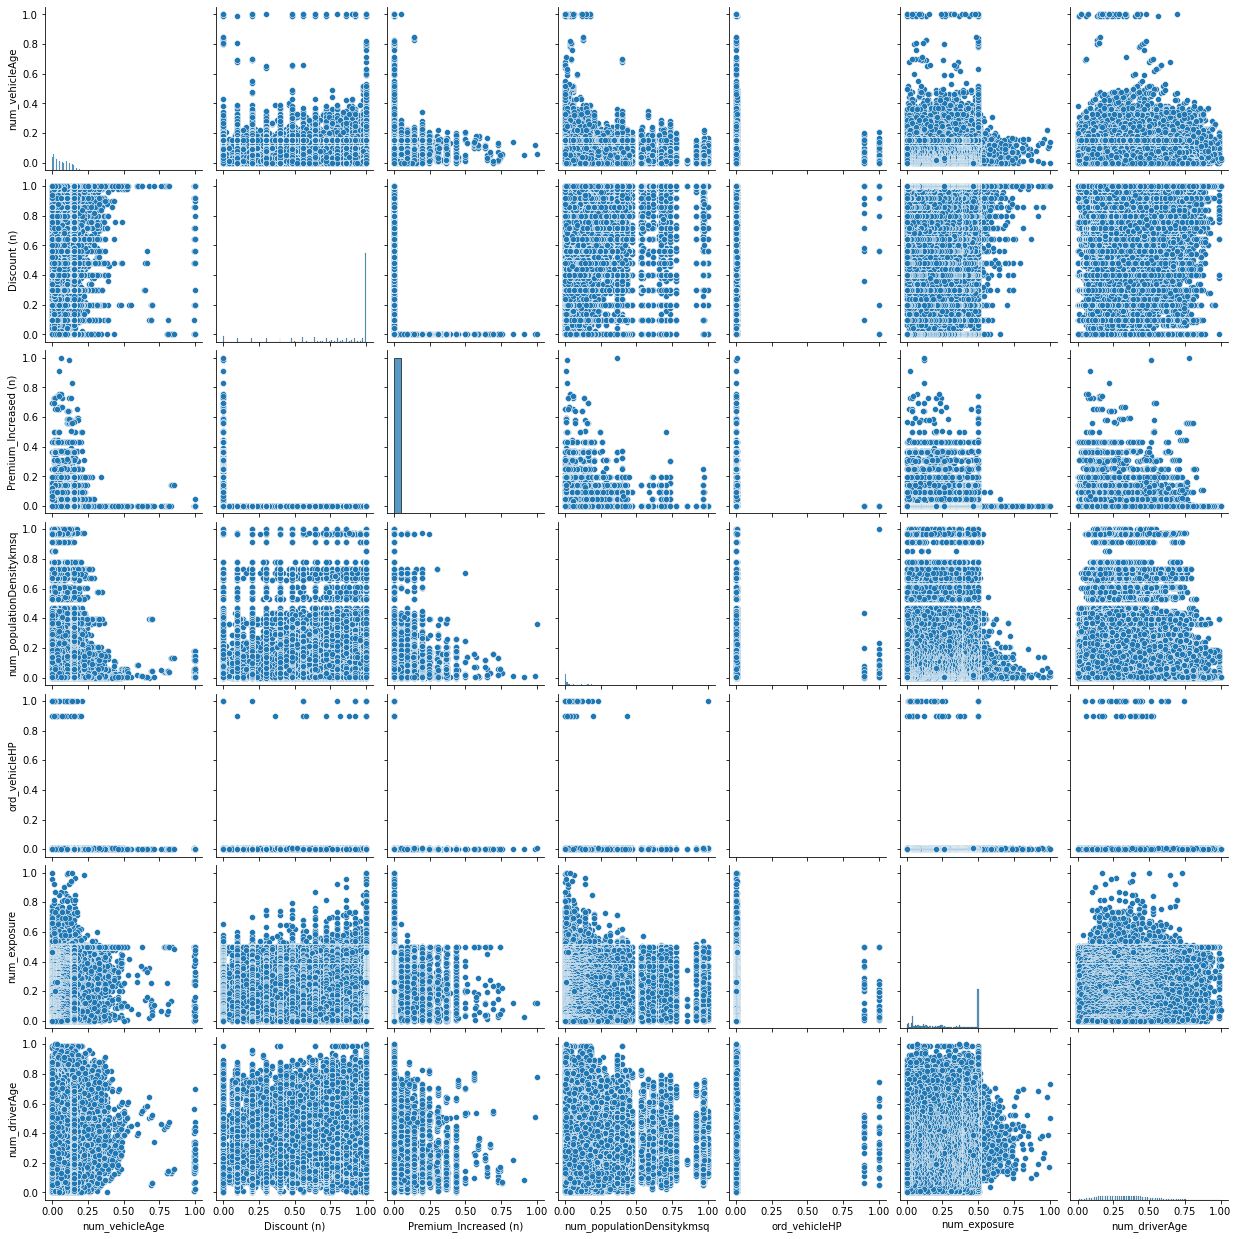

In [60]:
subset = X_drop_outliers[['num_vehicleAge',
                                     'Discount (n)',
                                     'Premium_Increased (n)',
                                     'num_populationDensitykmsq',
                                     'ord_vehicleHP',
                                     'num_exposure',
                                     'num_driverAge']]

scaler = MinMaxScaler()
standardized = pd.DataFrame(scaler.fit_transform(subset), columns=subset.columns)
sns.pairplot(standardized)

## Distribution

<AxesSubplot:xlabel='ord_vehicleHP', ylabel='Density'>

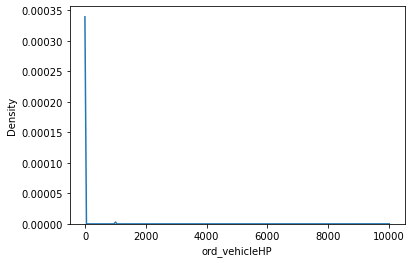

In [61]:
sns.kdeplot(dataset['ord_vehicleHP'])

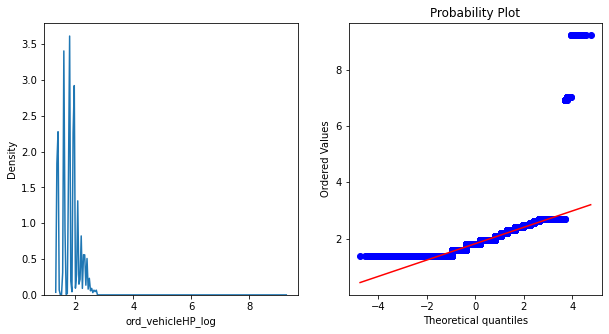

In [62]:
import scipy.stats as stats
import pylab

dataset['ord_vehicleHP_log'] = np.log(dataset['ord_vehicleHP'])

def normality(data,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data[feature])
    plt.subplot(1,2,2)
    stats.probplot(data[feature],plot=pylab)
    plt.show()

normality(dataset,'ord_vehicleHP_log')

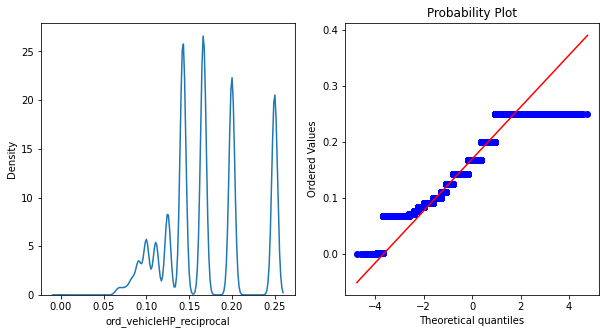

In [63]:
dataset['ord_vehicleHP_reciprocal'] = 1/dataset['ord_vehicleHP']
normality(dataset,'ord_vehicleHP_reciprocal')

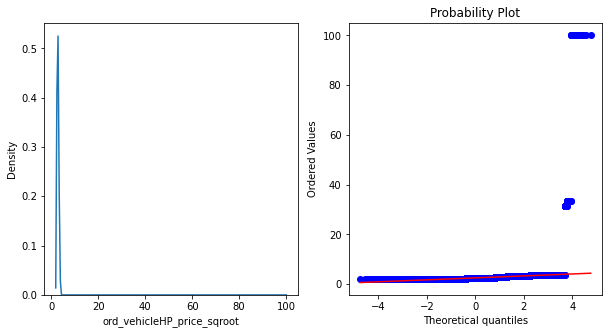

In [64]:
dataset['ord_vehicleHP_price_sqroot'] = np.sqrt(dataset['ord_vehicleHP'])
normality(dataset,'ord_vehicleHP_price_sqroot')


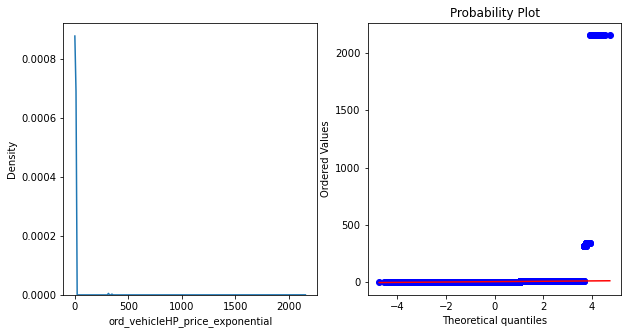

In [65]:
dataset['ord_vehicleHP_price_exponential'] = dataset['ord_vehicleHP']**(1/1.2)
normality(dataset,'ord_vehicleHP_price_exponential')

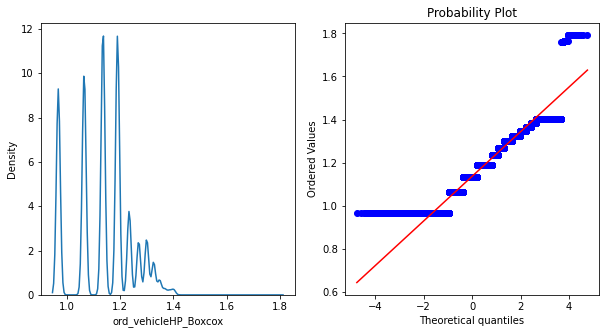

In [66]:
dataset['ord_vehicleHP_Boxcox'],parameters = stats.boxcox(dataset['ord_vehicleHP'])
normality(dataset,'ord_vehicleHP_Boxcox')

### Without outliers

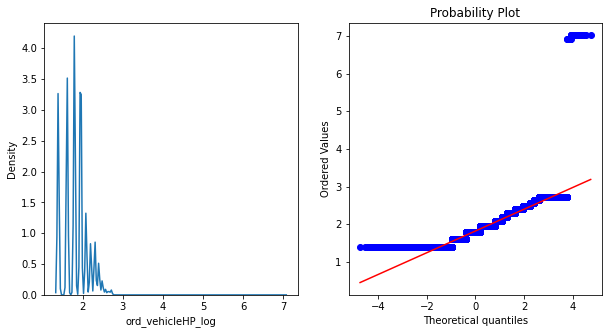

In [67]:
X_drop_outliers['ord_vehicleHP_log'] = np.log(X_drop_outliers['ord_vehicleHP'])
normality(X_drop_outliers,'ord_vehicleHP_log')

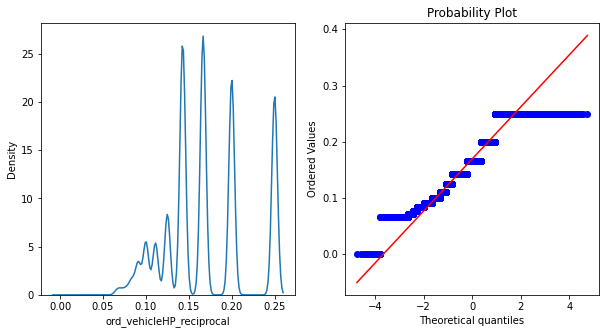

In [68]:
X_drop_outliers['ord_vehicleHP_reciprocal'] = 1/X_drop_outliers['ord_vehicleHP']
normality(X_drop_outliers,'ord_vehicleHP_reciprocal')

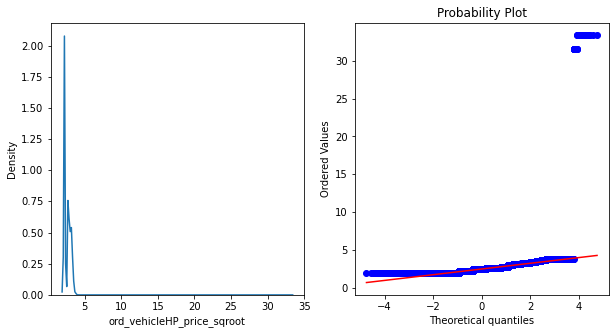

In [69]:
X_drop_outliers['ord_vehicleHP_price_sqroot'] = np.sqrt(X_drop_outliers['ord_vehicleHP'])
normality(X_drop_outliers,'ord_vehicleHP_price_sqroot')

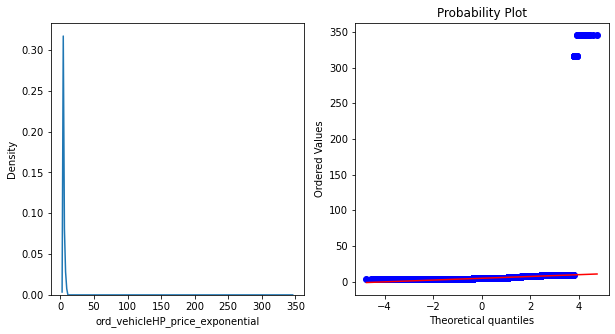

In [70]:
X_drop_outliers['ord_vehicleHP_price_exponential'] = X_drop_outliers['ord_vehicleHP']**(1/1.2)
normality(X_drop_outliers,'ord_vehicleHP_price_exponential')

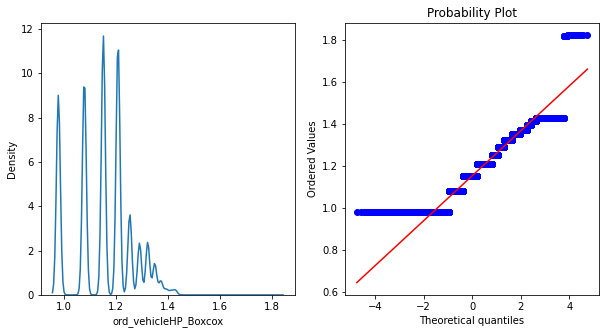

In [71]:
X_drop_outliers['ord_vehicleHP_Boxcox'],parameters = stats.boxcox(X_drop_outliers['ord_vehicleHP'])
normality(X_drop_outliers,'ord_vehicleHP_Boxcox')

#### other variables

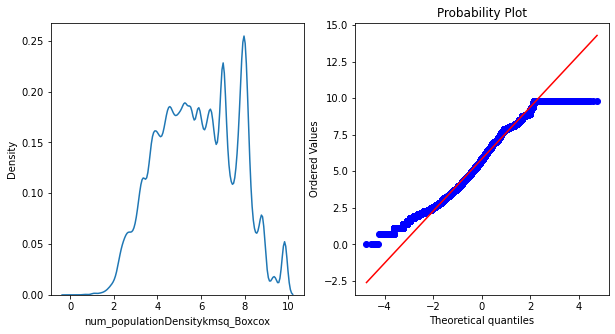

In [72]:
dataset['num_populationDensitykmsq_Boxcox'],parameters = stats.boxcox(dataset['num_populationDensitykmsq'])
normality(dataset,'num_populationDensitykmsq_Boxcox')

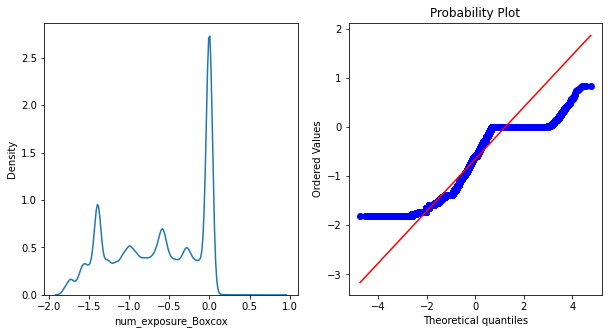

In [73]:
dataset['num_exposure_Boxcox'],parameters = stats.boxcox(dataset['num_exposure'])
normality(dataset,'num_exposure_Boxcox')

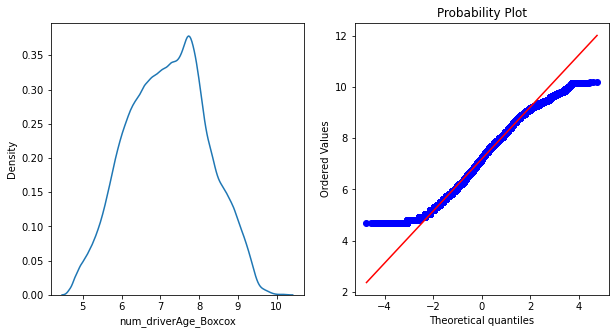

In [74]:
dataset['num_driverAge_Boxcox'],parameters = stats.boxcox(dataset['num_driverAge'])
normality(dataset,'num_driverAge_Boxcox')

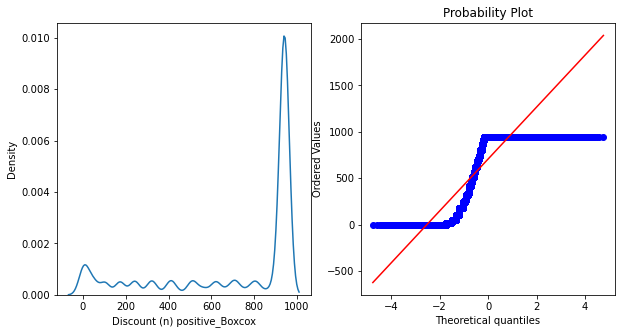

In [75]:
dataset['Discount (n) positive'] = dataset['Discount (n)']  + 1

dataset['Discount (n) positive_Boxcox'],parameters = stats.boxcox(dataset['Discount (n) positive'])
normality(dataset,'Discount (n) positive_Boxcox')


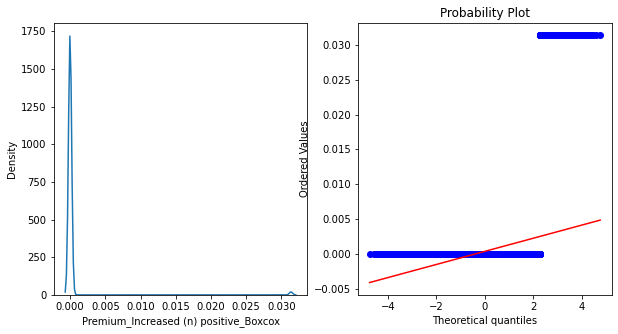

In [76]:
dataset['Premium_Increased (n) positive'] = dataset['Premium_Increased (n)']  + 1

dataset['Premium_Increased (n) positive_Boxcox'],parameters = stats.boxcox(dataset['Premium_Increased (n) positive'])
normality(dataset,'Premium_Increased (n) positive_Boxcox')

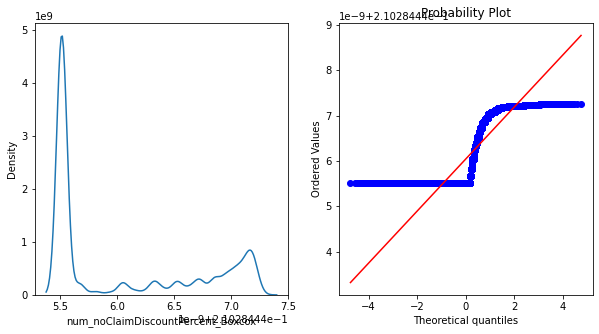

In [77]:
dataset['num_noClaimDiscountPercent_Boxcox'],parameters = stats.boxcox(dataset['num_noClaimDiscountPercent'])
normality(dataset,'num_noClaimDiscountPercent_Boxcox')

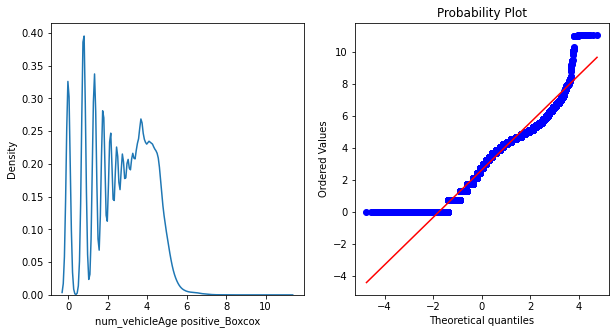

In [78]:
dataset['num_vehicleAge positive'] = dataset['num_vehicleAge']  + 1

dataset['num_vehicleAge positive_Boxcox'],parameters = stats.boxcox(dataset['num_vehicleAge positive'])
normality(dataset,'num_vehicleAge positive_Boxcox')

In [79]:
X_drop_outliers['ord_vehicleHP'],parameters = stats.boxcox(X_drop_outliers['ord_vehicleHP'])

X_drop_outliers['num_populationDensitykmsq'],parameters = stats.boxcox(X_drop_outliers['num_populationDensitykmsq'])

X_drop_outliers['num_exposure'],parameters = stats.boxcox(X_drop_outliers['num_exposure'])

X_drop_outliers['num_driverAge'],parameters = stats.boxcox(X_drop_outliers['num_driverAge'])

X_drop_outliers['Discount (n)'] = X_drop_outliers['Discount (n)']  + 1
X_drop_outliers['Discount (n)'],parameters = stats.boxcox(X_drop_outliers['Discount (n)'])

X_drop_outliers['Premium_Increased (n)'] = X_drop_outliers['Premium_Increased (n)']  + 1
X_drop_outliers['Premium_Increased (n)'],parameters = stats.boxcox(X_drop_outliers['Premium_Increased (n)'])

X_drop_outliers['num_noClaimDiscountPercent'],parameters = stats.boxcox(X_drop_outliers['num_noClaimDiscountPercent'])

X_drop_outliers['num_vehicleAge'] = X_drop_outliers['num_vehicleAge']  + 1

X_drop_outliers['num_vehicleAge'],parameters = stats.boxcox(X_drop_outliers['num_vehicleAge'])

## Feature Importance

In [80]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier( n_estimators = 50).fit(X_drop_outliers, 
                                                    y_drop_outliers.values.ravel())

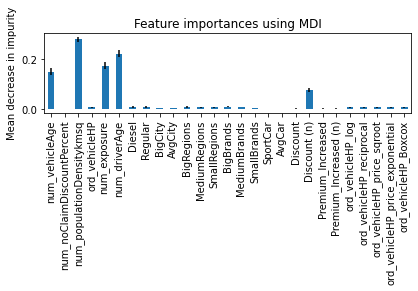

In [81]:
feature_names = X_drop_outliers.columns
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

### KBest

In [82]:
from sklearn.feature_selection import SelectKBest, f_regression

X_kbest = SelectKBest(score_func=f_regression,k=10)

X_kbest_fit = X_kbest.fit_transform(X_drop_outliers,y_drop_outliers.values.ravel())

X_kbest_scores = pd.DataFrame(X_kbest.scores_)
X_kbest_columns = pd.DataFrame(X_drop_outliers.columns)

X_kbest_feature_scores = pd.concat([X_kbest_columns, X_kbest_scores],axis=1)
X_kbest_feature_scores.columns = ['Feature_Name','Score']  
print(X_kbest_feature_scores.nlargest(10,'Score'))


                 Feature_Name        Score
4                num_exposure  3595.879371
20          Premium_Increased  1827.485239
21      Premium_Increased (n)  1827.485239
18                   Discount  1607.070232
19               Discount (n)  1085.594289
0              num_vehicleAge   374.211555
10                 BigRegions   140.723026
7                     Regular   110.605137
6                      Diesel   110.605137
2   num_populationDensitykmsq    96.650307


## PCA

In [83]:
from sklearn.decomposition import PCA

scaler = RobustScaler()
standardized_normalized = pd.DataFrame(scaler.fit_transform(X_drop_outliers), columns=X_drop_outliers.columns)

pca = PCA(.9)
pca.fit(standardized_normalized)

dataset_pca = pd.DataFrame(pca.transform(standardized_normalized))
pca_names = [f'Principal Component {i+1}' for i in range(dataset_pca.shape[1])]
dataset_pca.columns = pca_names

pca_explained_variance_ratio = pd.Series(pca.explained_variance_ratio_, index=pca_names)

print(pca_explained_variance_ratio)
print(dataset_pca.head(10))

Principal Component 1    0.571835
Principal Component 2    0.148861
Principal Component 3    0.074648
Principal Component 4    0.037304
Principal Component 5    0.032006
Principal Component 6    0.025970
Principal Component 7    0.024345
dtype: float64
   Principal Component 1  Principal Component 2  Principal Component 3  \
0              -1.312784               0.723337               0.865920   
1              -1.316906               0.726632               0.979845   
2              -0.228427              -0.161044               0.958104   
3               0.713875              -0.727610               0.669704   
4               0.709344              -0.723988               0.794939   
5              -0.257779              -0.025562               0.434886   
6              -0.257405              -0.025861               0.424558   
7               0.677685              -0.596183              -1.034114   
8               0.675289              -0.594268              -0.967901   
9      

## Train, Validation, Test 

In [84]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score,  cross_val_predict, GridSearchCV, StratifiedKFold
from sklearn.metrics import recall_score, confusion_matrix, classification_report , roc_curve, roc_auc_score, auc

x_alt, X_test, y_alt, y_test = train_test_split(standardized_normalized,y_drop_outliers,test_size=0.2,train_size=0.8, shuffle=True)
X_train, X_cv, y_train, y_cv = train_test_split(x_alt,y_alt,test_size = 0.25,train_size =0.75, shuffle=True)

#PCA
x_pca_alt, X_pca_test, y_pca_alt, y_pca_test = train_test_split(dataset_pca,y_drop_outliers,test_size=0.2,train_size=0.8, shuffle=True)
X_pca_train, X_pca_cv, y_pca_train, y_pca_cv = train_test_split(x_pca_alt,y_pca_alt,test_size = 0.25,train_size =0.75, shuffle=True)

print('Mean Claim Y test', round(y_test['claim_binary'].mean(),2))
print('Mean Claim Y alt', round(y_alt['claim_binary'].mean(),2))
print('Mean Claim Y train', round(y_train['claim_binary'].mean(),2))
print('Mean Claim Y cv', round(y_cv['claim_binary'].mean(),2))

y_train = y_train.values.ravel()
y_pca_train = y_pca_train.values.ravel()
y_test = y_test.values.ravel()
y_pca_test = y_pca_test.values.ravel()
y_alt = y_alt.values.ravel()
y_pca_alt = y_pca_alt.values.ravel()
y_cv = y_cv.values.ravel()
y_pca_cv = y_pca_cv.values.ravel()  


Mean Claim Y test 0.05
Mean Claim Y alt 0.05
Mean Claim Y train 0.05
Mean Claim Y cv 0.05


## Models

KNN: mean:0.530000 std:(0.000000)
MLP: mean:0.580000 std:(0.010000)
LogisticRegression: mean:0.550000 std:(0.010000)


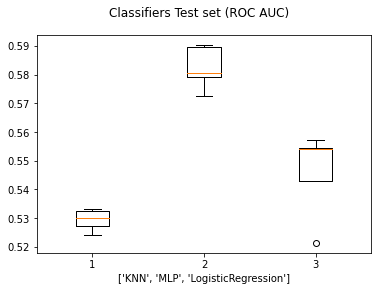

In [85]:
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.svm import OneClassSVM
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

classifiers = []
classifiers.append(('KNN', KNeighborsClassifier()))
#classifiers.append(('OneClassSVM', OneClassSVM()))
classifiers.append(('MLP', MLPClassifier()))
classifiers.append(('LogisticRegression', LogisticRegression()))

results_train = []
names_train = []
for name, classifier in classifiers:
    model = classifier.fit(x_pca_alt, y_pca_alt)
    stratified_kfold = StratifiedKFold(n_splits=5,shuffle=True, random_state=13)
    cv_results = cross_val_score(model, X_pca_test, y_pca_test, cv=stratified_kfold, scoring='roc_auc')
    results_train.append(cv_results)
    names_train.append(name)
    msg = '%s: mean:%f std:(%f)' % (name, round(cv_results.mean(),2), round(cv_results.std(),2))
    print(msg)

fig = plt.figure()
fig.suptitle('Classifiers Test set (ROC AUC)')
ax = fig.add_subplot(111)
plt.boxplot(results_train)
plt.xlabel(names_train)
plt.show()

### Trees

AdaBoost: mean:0.660000 std:(0.010000)
Bagging : mean:0.580000 std:(0.010000)
GradientBoosting: mean:0.680000 std:(0.010000)
RandomForest: mean:0.630000 std:(0.010000)
ExtraTrees: mean:0.610000 std:(0.010000)


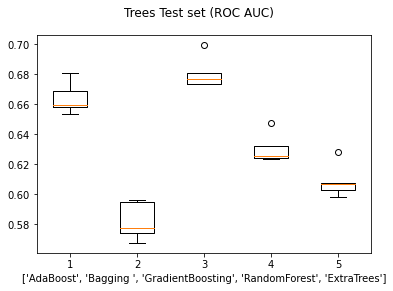

In [86]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier
from imblearn.combine import SMOTEENN

trees = []
trees.append(('AdaBoost', AdaBoostClassifier()))
trees.append(('Bagging ', BaggingClassifier()))
trees.append(('GradientBoosting', GradientBoostingClassifier()))
trees.append(('RandomForest', RandomForestClassifier()))
trees.append(('ExtraTrees', ExtraTreesClassifier()))

results_train = []
names_train = []
for name, classifier in trees:
    model = classifier.fit(x_alt, y_alt)
    stratified_kfold = StratifiedKFold(n_splits=5,shuffle=True, random_state=13)
    cv_results = cross_val_score(model, X_test, y_test, cv=stratified_kfold, scoring='roc_auc')
    results_train.append(cv_results)
    names_train.append(name)
    msg = '%s: mean:%f std:(%f)' % (name, round(cv_results.mean(),2), round(cv_results.std(),2))
    print(msg)

fig = plt.figure()
fig.suptitle('Trees Test set (ROC AUC)')
ax = fig.add_subplot(111)
plt.boxplot(results_train)
plt.xlabel(names_train)
plt.show()

### Grid Search and Oversampling

In [90]:
model = GradientBoostingClassifier().fit(x_alt, y_alt)
stratified_kfold = StratifiedKFold(n_splits=5,shuffle=True, random_state=13)

validation_score = model.score(X_cv, y_cv)
validation_predict = model.predict(X_cv)

y_test_pred_cross= cross_val_predict(model, X_test, y_test, cv=stratified_kfold)
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_cross)
roc_auc = roc_auc_score(y_test, y_test_pred_cross)
auc_ = auc(fpr,tpr)


# Confusion matrix
confusion_matrix_test_lgb = confusion_matrix(y_test, y_test_pred_cross) 
print(confusion_matrix_test_lgb)
print(classification_report(y_test, y_test_pred_cross))

TN = confusion_matrix_test_lgb[0][0]
FN = confusion_matrix_test_lgb[1][0]
TP = confusion_matrix_test_lgb[1][1]
FP = confusion_matrix_test_lgb[0][1]

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

print(f'GB ROC Curve test True Positive: {TP}')
print(f'GB ROC Curve test False Positive: {FP}')
print(f'GB ROC Curve test False Negative: {FN}')
print(f'GB ROC Curve test True Negative: {TN}')
print(f'GB ROC Curve test Recall: {TPR}')
print(f'GB ROC Curve test Overall accuracy: {ACC}')

[[126801     11]
 [  6662     17]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97    126812
           1       0.61      0.00      0.01      6679

    accuracy                           0.95    133491
   macro avg       0.78      0.50      0.49    133491
weighted avg       0.93      0.95      0.93    133491

GB ROC Curve test True Positive: 17
GB ROC Curve test False Positive: 11
GB ROC Curve test False Negative: 6662
GB ROC Curve test True Negative: 126801
GB ROC Curve test Recall: 0.0025452912112591706
GB ROC Curve test Overall accuracy: 0.9500116112696736


Ridge: mean:0.000000 std:(0.000000)
BayesianRidge : mean:0.000000 std:(0.000000)
KNeighbors: mean:-0.180000 std:(0.010000)


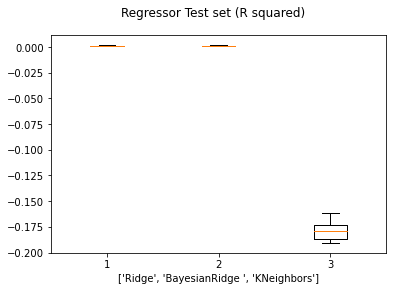

In [91]:
from sklearn.linear_model import RidgeCV, BayesianRidge
#from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.feature_selection import RFE
from xgboost import XGBRegressor, plot_importance
#from sklearn.svm import SVR

x_pca_alt, X_pca_test, y_pca_alt, y_pca_test = train_test_split(dataset_pca,y_regression_outliers,test_size=0.2,train_size=0.8, shuffle=True)
X_pca_train, X_pca_cv, y_pca_train, y_pca_cv = train_test_split(x_pca_alt,y_pca_alt,test_size = 0.25,train_size =0.75, shuffle=True)

y_pca_train = y_pca_train.values.ravel()
y_pca_test = y_pca_test.values.ravel()
y_pca_alt = y_pca_alt.values.ravel()
y_pca_cv = y_pca_cv.values.ravel()  

folds = KFold(n_splits = 5, shuffle = True, random_state = 13)

regressors = []
regressors.append(('Ridge', RidgeCV()))
regressors.append(('BayesianRidge ', BayesianRidge()))
regressors.append(('KNeighbors', KNeighborsRegressor()))
#regressors.append(('SVR', SVR()))
#regressors.append(('RandomForest', RandomForestRegressor()))

results_train = []
names_train = []
for name, regressor in regressors:
    model = regressor.fit(x_pca_alt, y_pca_alt)
    cv_results = cross_val_score(regressor, X_pca_test, y_pca_test, cv=folds, scoring='r2')
    results_train.append(cv_results)
    names_train.append(name)
    msg = '%s: mean:%f std:(%f)' % (name, round(cv_results.mean(),2), round(cv_results.std(),2))
    print(msg)

fig = plt.figure()
fig.suptitle('Regressor Test set (R squared)')
ax = fig.add_subplot(111)
plt.boxplot(results_train)
plt.xlabel(names_train)
plt.show()


### XGB Regressor

In [92]:
regressor = XGBRegressor(random_state='13')

folds = KFold(n_splits = 10, shuffle = True, random_state = 13)

"""
xgb_params = {'n_features_to_select': list(range(2,7)),
               'n_estimators': [50,100],
               'colsample_bytree': np.linspace(0.5, 0.9, 5),
               'max_depth': [10, 15, 20, 25]}
               
regressor = GridSearchCV(regressor, param_grid=xgb_params, cv=folds, scoring='r2',return_train_score=True)
"""

regressor.fit(X_pca_train, y_pca_train,)
scores = cross_val_score(regressor, X_pca_train, y_pca_train, scoring='r2', cv=folds)

print("R-Squared (K-fold mean) Training: %f" % (round(scores.mean(),2)))

R-Squared (K-fold mean) Training: 0.000000


'\n# plotting cv results\nplt.figure(figsize=(16,6))\nplt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])\nplt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])\nplt.xlabel(\'number of features\')\nplt.ylabel(\'r-squared\')\nplt.title("Optimal Number of Features")\nplt.legend([\'test score\', \'train score\'], loc=\'upper left\')\n'

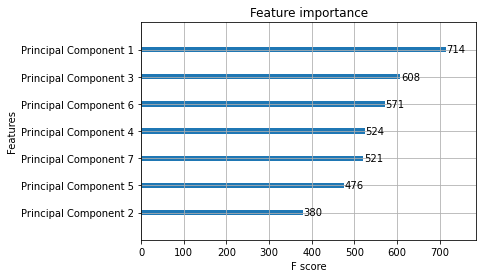

In [93]:
plot_importance(regressor)
#from xgboost import plot_tree
#plot_tree(regressor); plt.show()

"""
# plotting cv results
plt.figure(figsize=(16,6))
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')
"""

In [94]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
cv_results_validation = cross_val_score(regressor, X_pca_cv, y_pca_cv, cv=folds, scoring='r2')
validation_predict_cv = regressor.predict(X_pca_cv)
MAE_val = mean_absolute_error(y_pca_cv, validation_predict_cv)
MSE_val = mean_squared_error(y_pca_cv, validation_predict_cv)
rmse_cv = np.sqrt(MSE_val)

print("MAE (Mean Absolute Error) Validation: %f" % (MAE_val))
print("MSE (Mean Squared Error) Validation: %f" % (MSE_val))
print("RMSE (Root Mean Squared Error ) Validation: %f" % (rmse_cv))
print("R-Squared (K-fold mean) Validation: %f" % (cv_results_validation.mean()))

MAE (Mean Absolute Error) Validation: 0.099940
MSE (Mean Squared Error) Validation: 0.058127
RMSE (Root Mean Squared Error ) Validation: 0.241096
R-Squared (K-fold mean) Validation: -0.014002


In [95]:
cv_results_train = cross_val_score(regressor, X_pca_test, y_pca_test, cv=folds, scoring='r2')
test_predict_cv = regressor.predict(X_pca_test)
MAE_test = mean_absolute_error(y_pca_test,test_predict_cv)
MSE_test = mean_squared_error(y_pca_test,test_predict_cv)
rmse_test = np.sqrt(MSE_test)

print("MAE (Mean Absolute Error) Test: %f" % (MAE_test))
print("MSE (Mean Squared Error) Test: %f" % (MSE_test))
print("RMSE (Root Mean Squared Error ) Test: %f" % (rmse_cv))
print("R-Squared (K-fold mean) Test: %f" % (cv_results_train.mean()))

MAE (Mean Absolute Error) Test: 0.099483
MSE (Mean Squared Error) Test: 0.056640
RMSE (Root Mean Squared Error ) Test: 0.241096
R-Squared (K-fold mean) Test: -0.014275


In [96]:
#Regression (Drop Outliers)
scaler = MinMaxScaler()
X_train_min_max = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_min_max = pd.DataFrame(scaler.fit_transform(X_test), columns=X_train.columns)

from sklearn.linear_model import LogisticRegression
#from sklearn.svm import LinearSVC
from sklearn.feature_selection import RFE
rfe = RFE(LogisticRegression(max_iter=300), n_features_to_select=7)
#rfe = RFE(LinearSVC(), 7)
rfe = rfe.fit(X_train_min_max, y_train)
X_rfe = X_train[X_train.columns[rfe.support_]]
#print(rfe.support_)
#print(rfe.ranking_)
print(X_rfe.columns)

Index(['num_vehicleAge', 'num_noClaimDiscountPercent', 'ord_vehicleHP',
       'num_exposure', 'ord_vehicleHP_log', 'ord_vehicleHP_reciprocal',
       'ord_vehicleHP_Boxcox'],
      dtype='object')


In [97]:
X_rfe

,num_vehicleAge,num_noClaimDiscountPercent,ord_vehicleHP,num_exposure,ord_vehicleHP_log,ord_vehicleHP_reciprocal,ord_vehicleHP_Boxcox
453561,-0.383653,0.000000,-1.334273,0.389192,-1.205048,1.458333,-1.334273
39006,1.106271,0.000000,-1.334273,0.107301,-1.205048,1.458333,-1.334273
20901,-0.554049,0.000000,-1.334273,0.527506,-1.205048,1.458333,-1.334273
59401,-0.239424,0.000000,0.000000,0.527506,0.000000,0.000000,0.000000
570923,0.781140,0.927367,0.000000,0.527506,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...
202805,-0.767416,0.000000,0.000000,0.408261,0.000000,0.000000,0.000000
307931,-0.554049,1.190715,0.000000,-0.708043,0.000000,0.000000,0.000000
113632,-0.554049,0.000000,-0.564207,0.527506,-0.541862,0.583333,-0.564207
99072,0.589377,0.000000,-0.564207,-0.885748,-0.541862,0.583333,-0.564207


In [98]:
from statsmodels.api import OLS
OLS(y_train,X_rfe).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.044
Model:                            OLS   Adj. R-squared (uncentered):              0.044
Method:                 Least Squares   F-statistic:                              3095.
Date:                Tue, 21 Sep 2021   Prob (F-statistic):                        0.00
Time:                        23:36:25   Log-Likelihood:                          39834.
No. Observations:              400473   AIC:                                 -7.966e+04
Df Residuals:                  400467   BIC:                                 -7.959e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
num_vehicleAge                -0.0189      0.001    -31.520      0.000      -0.020      -0.018
num_noClaimDiscountPercent     0.0504      0.001     92.503      0.000       0.049       0.051
ord_vehicleHP                  0.1902      0.007     26.829      0.000       0.176       0.204
num_exposure                   0.0444      0.001     61.223      0.000       0.043       0.046
ord_vehicleHP_log             -0.0753      0.005    -13.723      0.000      -0.086      -0.065
ord_vehicleHP_reciprocal       0.3035      0.009     33.643      0.000       0.286       0.321
ord_vehicleHP_Boxcox           0.1902      0.007     26.829      0.000       0.176       0.204
==============================================================================
Omnibus:                   315818.986   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4438707.776
Skew:                           3.968   Prob(JB):                         0.00
Kurtosis:                      17.248   Cond. No.                     1.23e+16
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 7.74e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [99]:
#from sklearn.svm import LinearSVC
#regressor = LinearSVC()
#regressor.fit(X_train_min_max, y_train)
regressor = LogisticRegression(max_iter=300)
regressor.fit(X_train_min_max, y_train)
scores = cross_val_score(regressor, X_train_min_max, y_train, scoring='r2', cv=folds)

cv_results_test = cross_val_score(regressor, X_test_min_max, y_test, cv=folds, scoring='r2')
test_predict = regressor.predict(X_test_min_max)
MAE_test = mean_absolute_error(y_test, test_predict)
MSE_test = mean_squared_error(y_test, test_predict)
rmse_test = np.sqrt(MSE_test)

print("MAE (Mean Absolute Error) Validation: %f" % (MAE_test))
print("MSE (Mean Squared Error) Validation: %f" % (MSE_test))
print("RMSE (Root Mean Squared Error ) Validation: %f" % (rmse_test))
print("R-Squared (K-fold mean) Validation: %f" % (cv_results_test.mean()))

MAE (Mean Absolute Error) Validation: 0.050033
MSE (Mean Squared Error) Validation: 0.050033
RMSE (Root Mean Squared Error ) Validation: 0.223681
R-Squared (K-fold mean) Validation: -0.052672
